In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Charger les fichiers
df = pd.read_excel(r"C:\Users\hp\Desktop\Sensor_Data.xlsx")

# Convertir les dates
df['Heure'] = pd.to_datetime(df['Heure'])

In [3]:
df.head()

,Engin,Heure,Temp échappement Droit 540,Temp échappement gauche 538,Temp liquide refroidissement 525,Temp sortie convertisseur 544,Pression embrayage impeller 536,Température Essieux avant 531,Régime moteur 530,Température huile direction 541,Température huile freinage 522,Température PTO avant 532,Pression huile moteur 529
0,994 F2,2025-04-08 10:06:33,510,499,100.0,120.0,1884.0,32.0,1448.0,62.0,92.0,71.0,411.0
1,994 F2,2025-04-08 10:04:32,510,499,100.0,120.0,1362.0,32.0,1448.0,62.0,91.0,71.0,414.0
2,994 F2,2025-04-08 10:02:33,500,490,100.0,113.0,1513.0,32.0,1395.0,61.0,92.0,71.0,414.0
3,994 F2,2025-04-08 10:00:32,493,486,99.0,111.0,1513.0,31.0,1284.0,61.0,93.0,71.0,432.0
4,994 F2,2025-04-08 09:58:31,474,470,99.0,105.0,469.0,31.0,1284.0,58.0,93.0,70.0,414.0


In [4]:
df.drop(columns=['Heure', 'Engin']).describe()

,Temp échappement Droit 540,Temp échappement gauche 538,Temp liquide refroidissement 525,Temp sortie convertisseur 544,Pression embrayage impeller 536,Température Essieux avant 531,Régime moteur 530,Température huile direction 541,Température huile freinage 522,Température PTO avant 532,Pression huile moteur 529
count,92366.000000,92366.000000,92345.000000,92341.000000,92360.000000,88379.000000,87850.000000,88379.000000,88363.000000,89545.000000,89177.000000
mean,415.684570,414.433179,89.364773,100.755374,1278.492053,47.783682,1490.611155,56.745935,81.485565,64.877481,443.727654
std,101.516914,98.861474,9.309538,14.275762,654.704840,9.455236,280.277237,9.717864,14.183022,10.689861,59.078321
min,30.000000,30.000000,7.000000,15.000000,56.000000,9.000000,100.000000,10.000000,10.000000,1.000000,1.000000
25%,388.000000,390.000000,87.000000,96.000000,565.000000,43.000000,1443.000000,52.000000,76.000000,61.000000,431.000000
50%,451.000000,447.000000,89.000000,103.000000,1362.000000,50.000000,1624.000000,57.000000,84.000000,67.000000,450.000000
75%,480.000000,477.000000,93.000000,109.000000,1926.000000,54.000000,1657.000000,63.000000,90.000000,72.000000,467.000000
max,644.000000,663.000000,118.000000,139.000000,2709.000000,71.000000,1869.000000,85.000000,129.000000,85.000000,733.000000


In [5]:
df.shape

(92366, 13)

In [7]:
df = df[~df.isnull().any(axis=1)]
df.shape

(87850, 13)

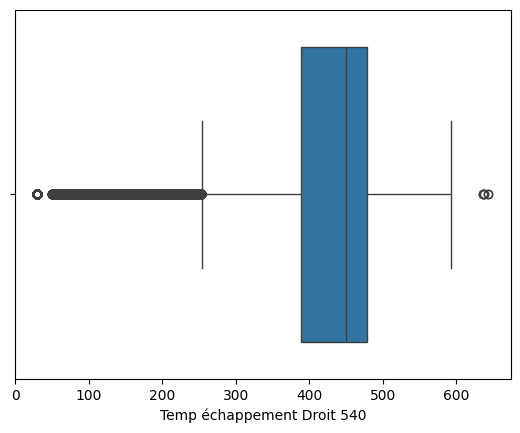

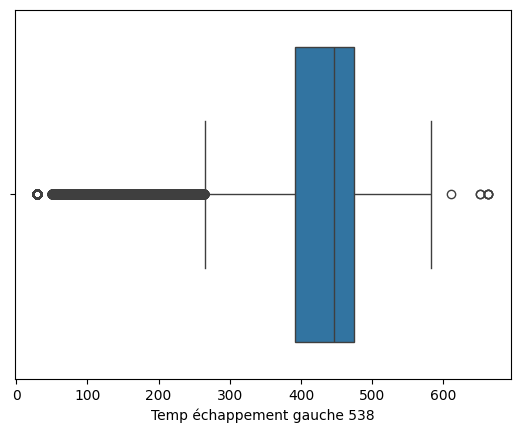

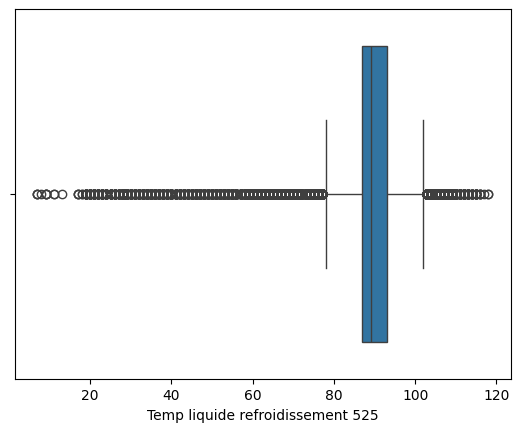

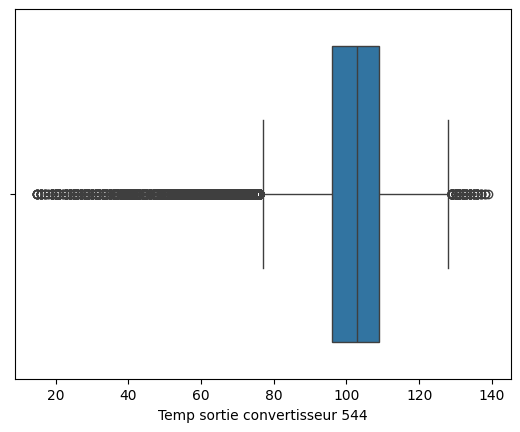

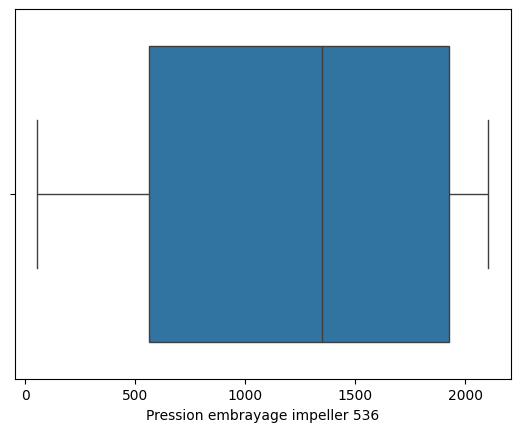

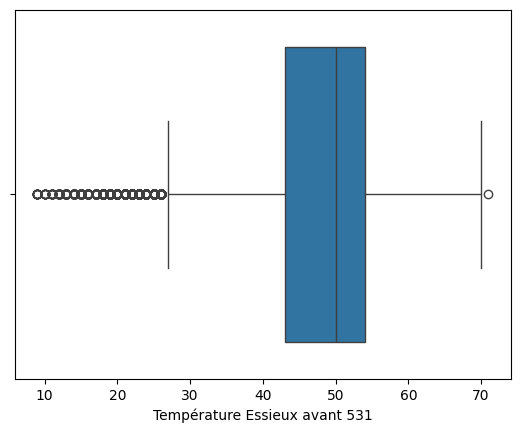

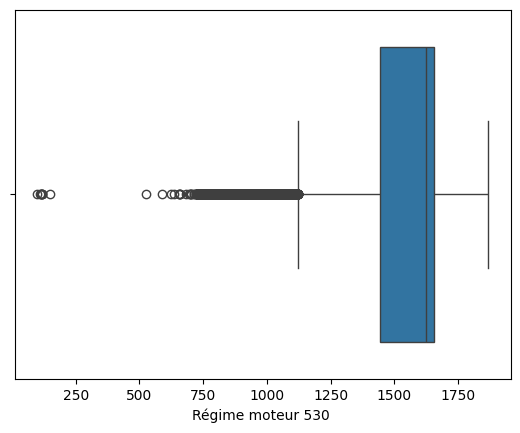

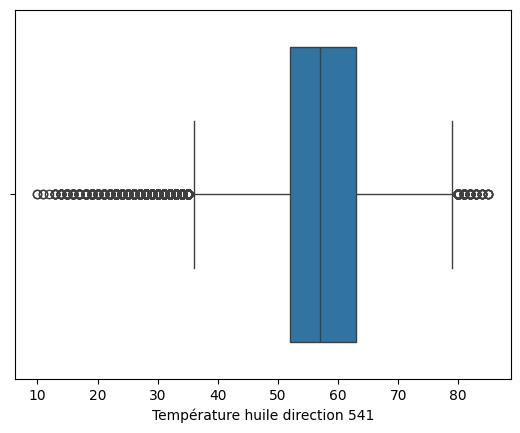

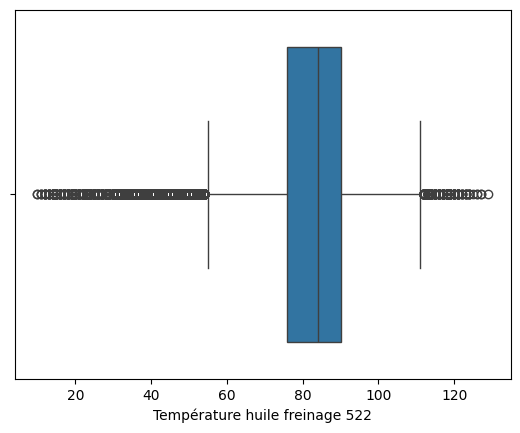

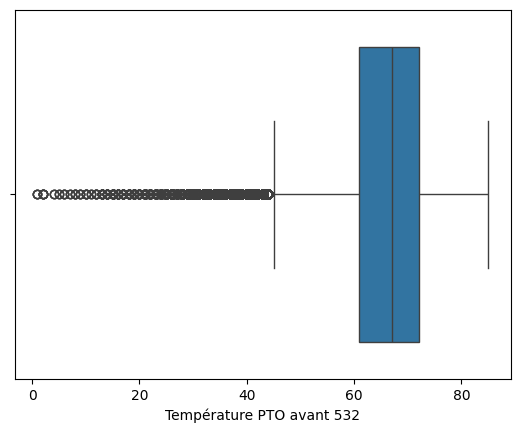

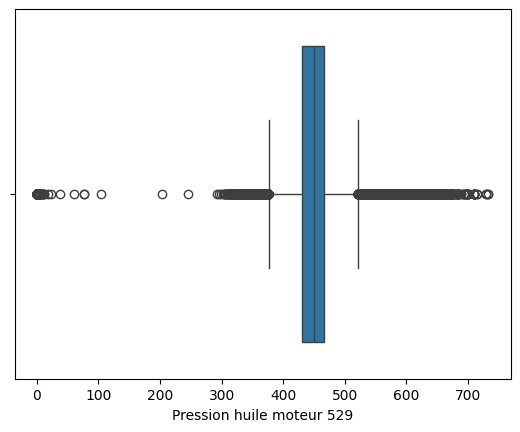

In [8]:
#Box plot to identify Outliers 
for i in df.select_dtypes(include ="number").columns :
    sns.boxplot(data = df, x=i)
    plt.show()

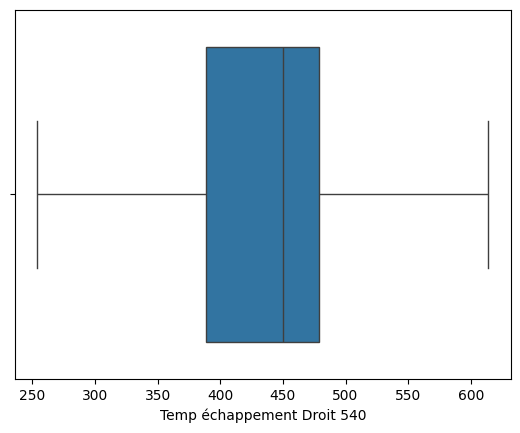

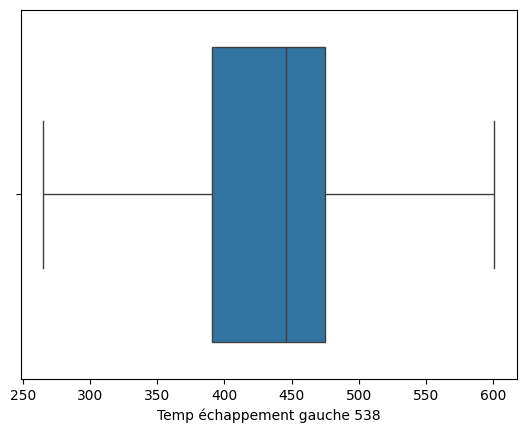

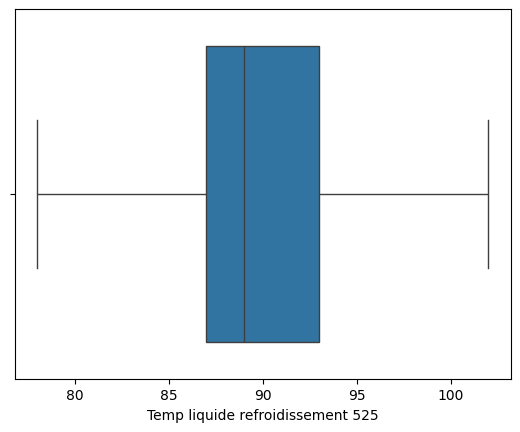

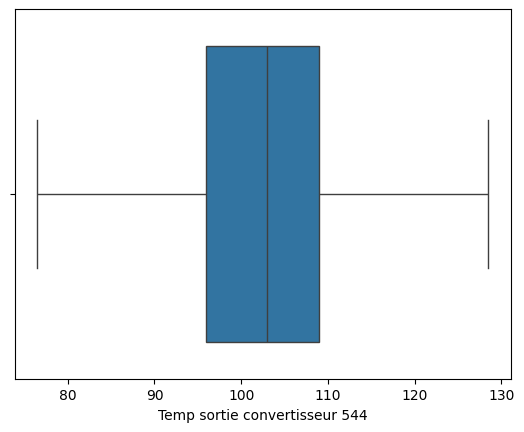

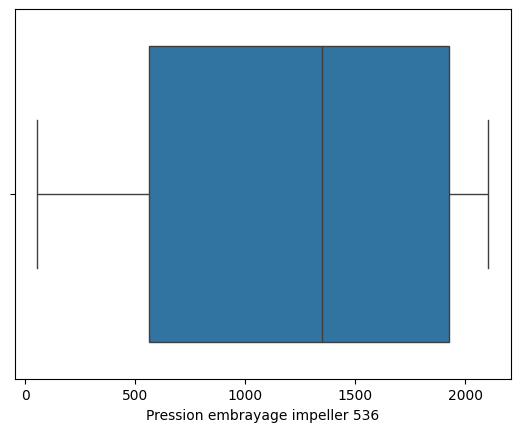

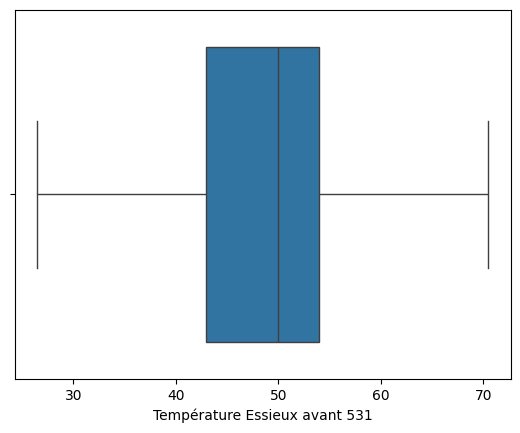

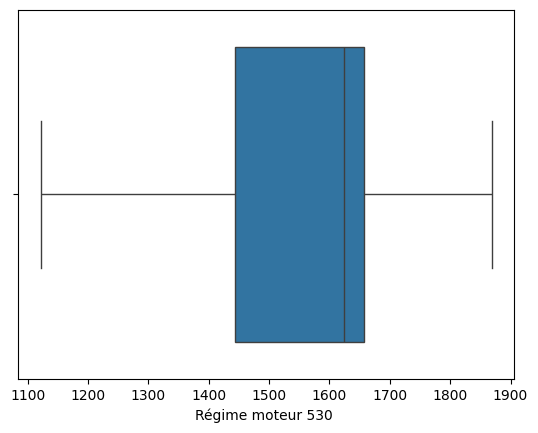

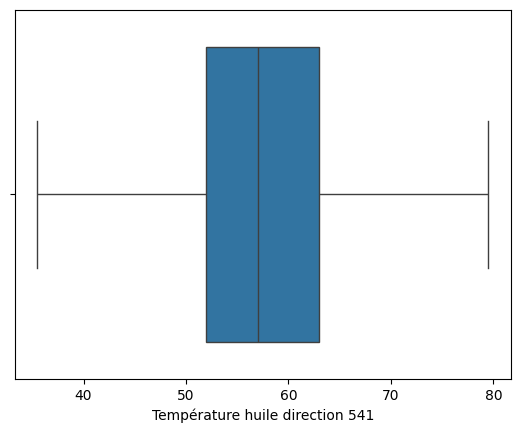

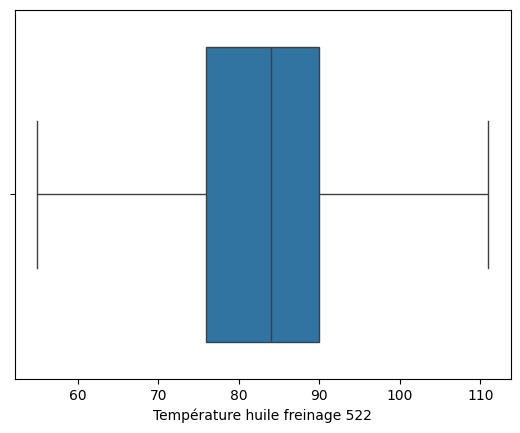

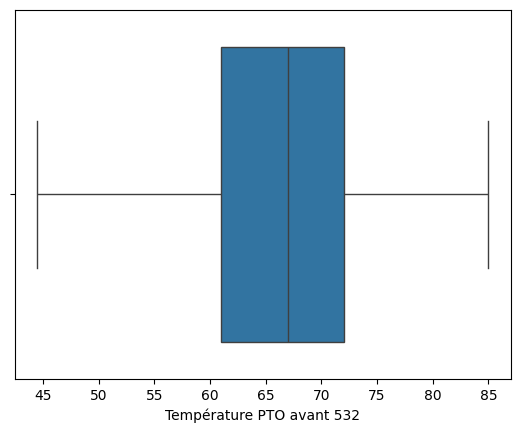

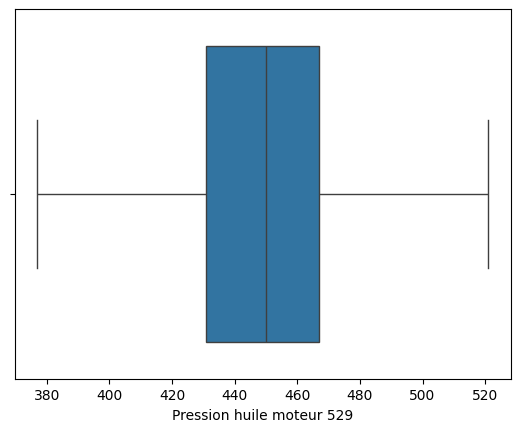

In [9]:
#Outliers Treatments
for i in df.select_dtypes(include ="number").columns :
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound =q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[i]= np.where(df[i] < lower_bound, lower_bound, df[i])
    df[i]= np.where(df[i] > upper_bound, upper_bound, df[i])
    sns.boxplot(data = df, x=i)
    plt.show()

In [10]:
# Calculer Lower Bound et Upper Bound pour chaque capteur
seuils_outliers = []

for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    seuils_outliers.append({
        "Capteur": col,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    })

# Créer un DataFrame pour afficher tout proprement
seuils_outliers_df = pd.DataFrame(seuils_outliers)

# Afficher le tableau complet
print(seuils_outliers_df)


                             Capteur  Lower Bound  Upper Bound
0         Temp échappement Droit 540        254.0        614.0
1        Temp échappement gauche 538        265.0        601.0
2   Temp liquide refroidissement 525         78.0        102.0
3      Temp sortie convertisseur 544         76.5        128.5
4    Pression embrayage impeller 536      -1476.5       3967.5
5      Température Essieux avant 531         26.5         70.5
6                 Régime moteur 530        1122.0       1978.0
7    Température huile direction 541         35.5         79.5
8     Température huile freinage 522         55.0        111.0
9          Température PTO avant 532         44.5         88.5
10         Pression huile moteur 529        377.0        521.0


In [ ]:
# Sélectionner seulement les colonnes numériques
numeric_cols = df.select_dtypes(include='number').columns

# Créer un scaler
scaler = MinMaxScaler()

# Appliquer la normalisation
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Maintenant toutes tes colonnes numériques sont normalisées entre 0 et 1
print(df.head())


    Engin               Heure  Temp échappement Droit 540  \
0  994 F2 2025-04-08 10:06:33                    0.711111   
1  994 F2 2025-04-08 10:04:32                    0.711111   
2  994 F2 2025-04-08 10:02:33                    0.683333   
3  994 F2 2025-04-08 10:00:32                    0.663889   
4  994 F2 2025-04-08 09:58:31                    0.611111   

   Temp échappement gauche 538  Temp liquide refroidissement 525  \
0                     0.696429                          0.916667   
1                     0.696429                          0.916667   
2                     0.669643                          0.916667   
3                     0.657738                          0.875000   
4                     0.610119                          0.875000   

   Temp sortie convertisseur 544  Pression embrayage impeller 536  \
0                       0.836538                         0.892578   
1                       0.836538                         0.637695   
2                